## Problem Statement

A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Variable	Definition

In [124]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

## Importing Libraries and Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv("./Data/BlackFridaySales.csv")

In [127]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
data.shape

(550068, 12)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


`Age` should be treated as a numerical column

`City_Category` we can convert this to a numerical column and should look at the frequency of each city category.

`Gender` has two values and should be converted to binary values

`Product_Category_2` and `Product_Category_3` have null values

## Checking Null values

In [15]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Null Value in percentage

In [16]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

There are 31% null values in the `Product_Category_2` and 69% null values in the `Product_Category_3`

# Unique elements in each attributes

In [17]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

We can drop `User_ID` and `Product_ID` for model prediction as it has more unique values.

# EDA

## Target Variable Purchase

C:\Users\Kowshik.Mente\AppData\Local\Temp\ipykernel_22776\2016751557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Purchase"],color='r')
c:\Users\Kowshik.Mente\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kowshik.Mente\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.optio

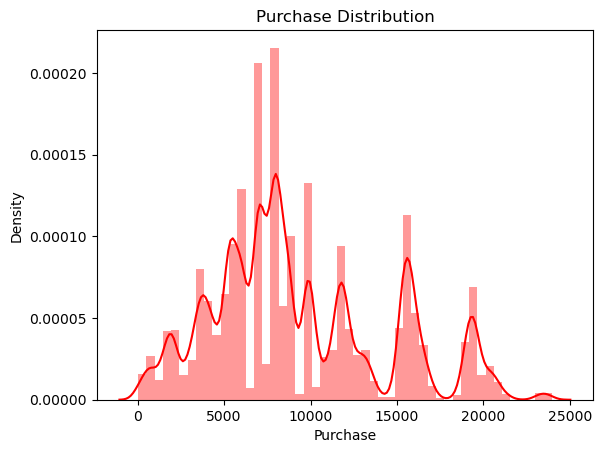

In [18]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

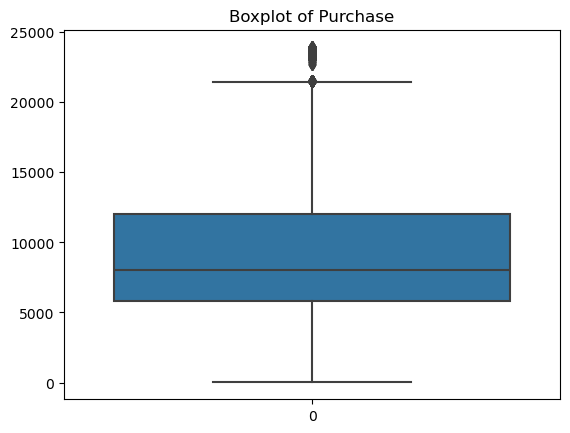

In [19]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [20]:
data["Purchase"].skew()

0.6001400037087128

In [21]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [22]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

### Gender

c:\Users\Kowshik.Mente\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kowshik.Mente\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kowshik.Mente\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


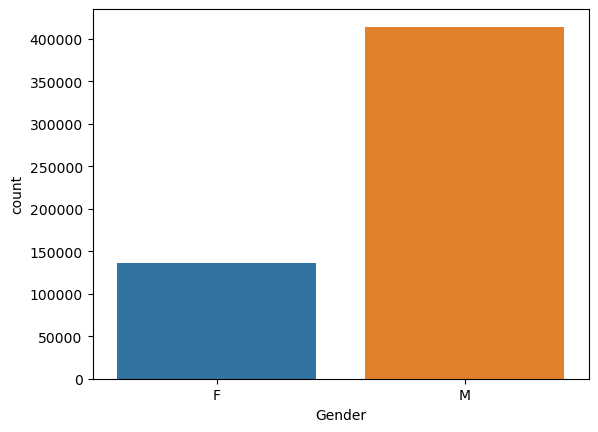

In [25]:
sns.countplot(x='Gender', data=data)
plt.show()

In [26]:
data['Gender'].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

There are more males than females

In [28]:
purchase_mean_by_gender = data.groupby("Gender")["Purchase"].mean()
print(purchase_mean_by_gender)

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

### Marital Status

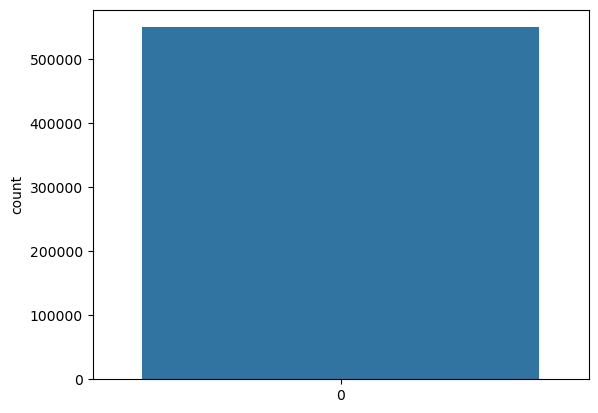

In [29]:
sns.countplot(data['Marital_Status'])
plt.show()

There are more unmarried people in the dataset who purchase more

In [31]:
purchase_mean_by_marital_status = data.groupby("Marital_Status")["Purchase"].mean()
print(purchase_mean_by_marital_status)

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64


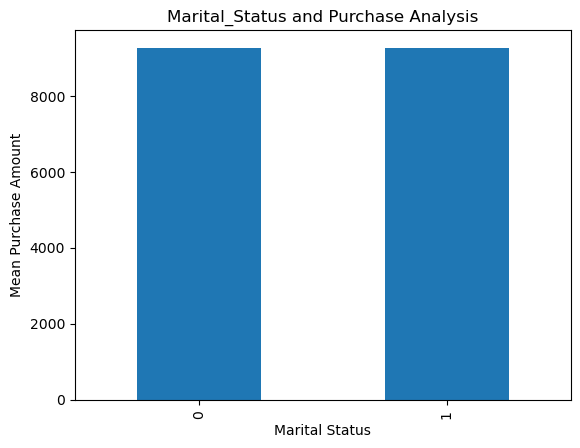

In [33]:
# Convert 'Purchase' column to numeric data type
data['Purchase'] = pd.to_numeric(data['Purchase'], errors='coerce')

# Group by 'Marital_Status' and calculate the mean of 'Purchase'
purchase_mean_by_marital_status = data.groupby("Marital_Status")["Purchase"].mean()

# Plotting
purchase_mean_by_marital_status.plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.xlabel("Marital Status")
plt.ylabel("Mean Purchase Amount")
plt.show()

This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

### Occupation

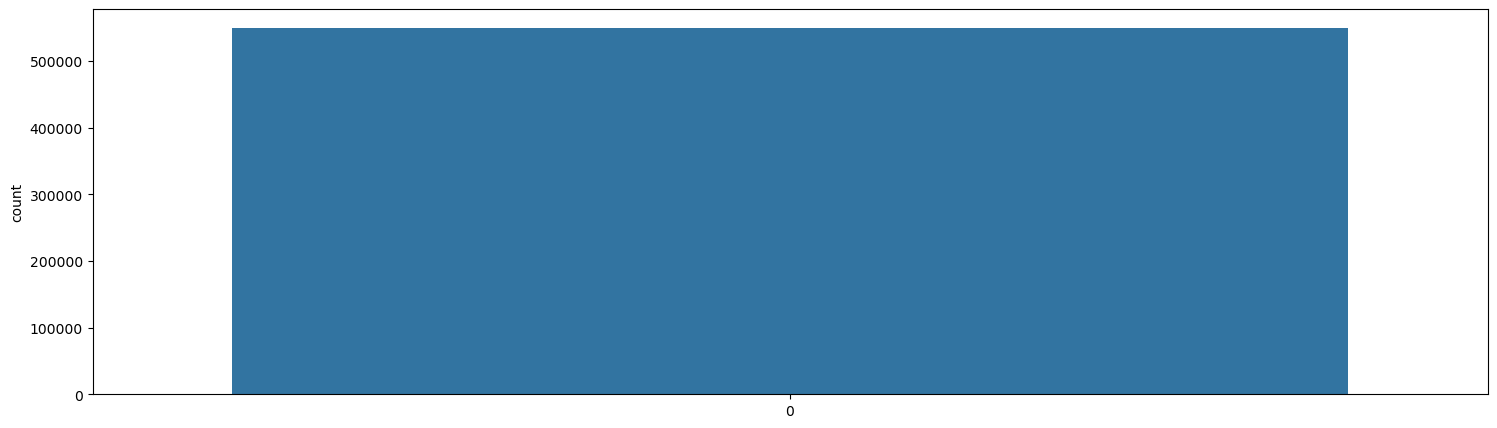

In [34]:
plt.figure(figsize=(18,5))
sns.countplot(data['Occupation'])
plt.show()

Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number

In [36]:

# Group by 'Occupation' and calculate the mean of 'Purchase'
occup_mean_purchase = data.groupby("Occupation")["Purchase"].mean()

# Create a DataFrame from the Series
occup = pd.DataFrame(occup_mean_purchase)

# Display the DataFrame
print(occup)

               Purchase
Occupation             
0           9124.428588
1           8953.193270
2           8952.481683
3           9178.593088
4           9213.980251
5           9333.149298
6           9256.535691
7           9425.728223
8           9532.592497
9           8637.743761
10          8959.355375
11          9213.845848
12          9796.640239
13          9306.351061
14          9500.702772
15          9778.891163
16          9394.464349
17          9821.478236
18          9169.655844
19          8710.627231
20          8836.494905


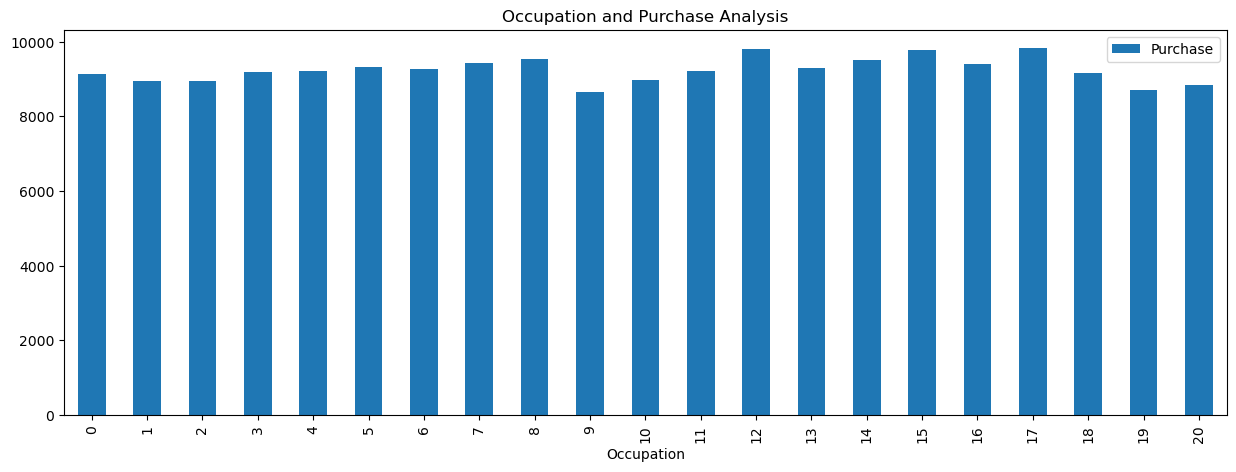

In [37]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

### City_Category

c:\Users\Kowshik.Mente\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kowshik.Mente\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


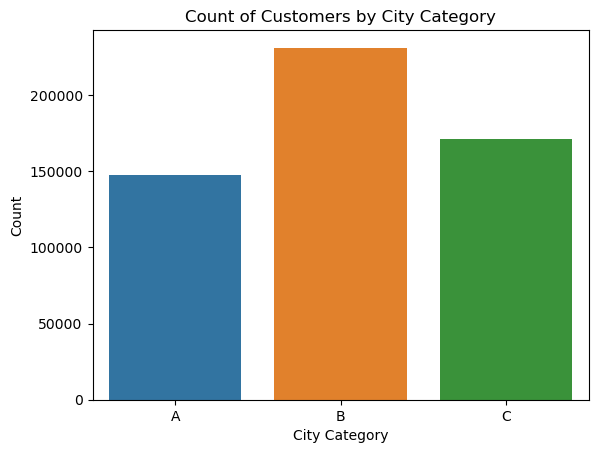

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot using Seaborn's barplot function
sns.barplot(x=data['City_Category'].value_counts().index, y=data['City_Category'].value_counts())
plt.title('Count of Customers by City Category')
plt.xlabel('City Category')
plt.ylabel('Count')
plt.show()


It is observed that city category B has made the most number of puchases.

C:\Users\Kowshik.Mente\AppData\Local\Temp\ipykernel_22776\3399600923.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_means = data.groupby("City_Category")["Purchase"].mean()


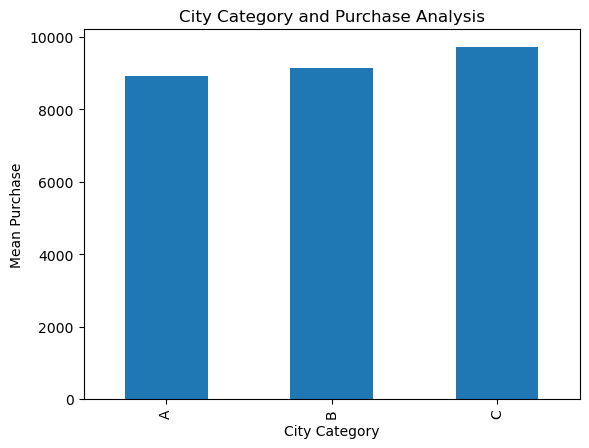

In [55]:
# Group by 'City_Category' and calculate mean of 'Purchase' for each category
purchase_means = data.groupby("City_Category")["Purchase"].mean()

# Plot the bar plot
purchase_means.plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.xlabel("City Category")
plt.ylabel("Mean Purchase")
plt.show()


However, the city whose buyers spend the most is city type ‘C’.

### Stay_In_Current_City_Years

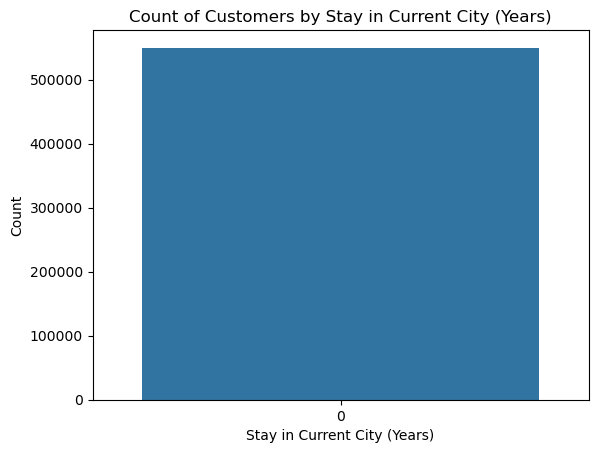

In [57]:
# Remove non-numeric characters and convert to numeric data type
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.replace('+', '').astype(float)

# Create the count plot
sns.countplot(data['Stay_In_Current_City_Years'])
plt.title('Count of Customers by Stay in Current City (Years)')
plt.xlabel('Stay in Current City (Years)')
plt.ylabel('Count')
plt.show()


It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

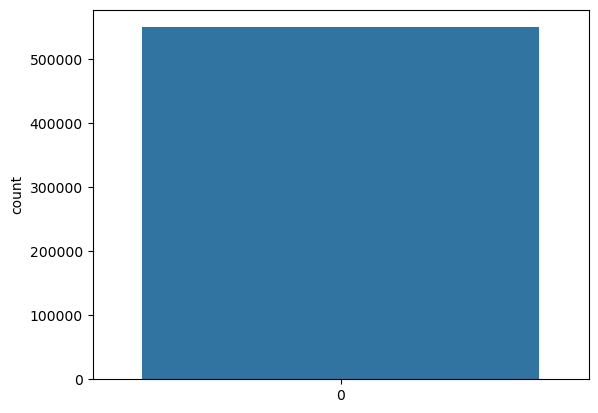

In [63]:
# Replace '4+' with a numerical value, say 5
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', 5)

# Now convert the column to integers
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

# Plot the count plot again
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()


We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

### Age

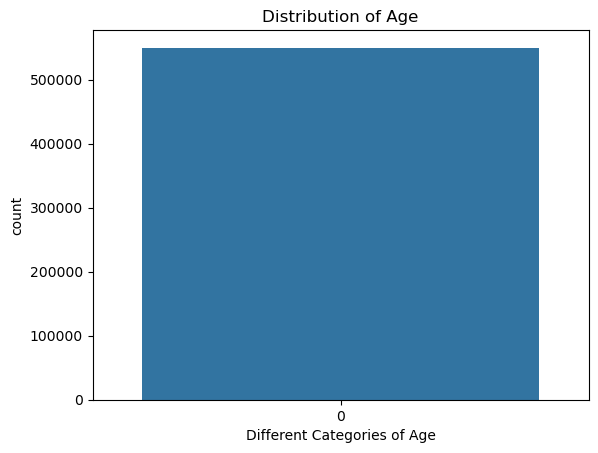

In [68]:
# Encode the 'Age' column into numerical values
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
data['Age'] = data['Age'].map(age_mapping)

# Plot the count plot again
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()


Age 26-35 Age group makes the most no of purchases in the age group.

C:\Users\Kowshik.Mente\AppData\Local\Temp\ipykernel_22776\933145997.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_purchase_by_age = data.groupby("Age")["Purchase"].mean()


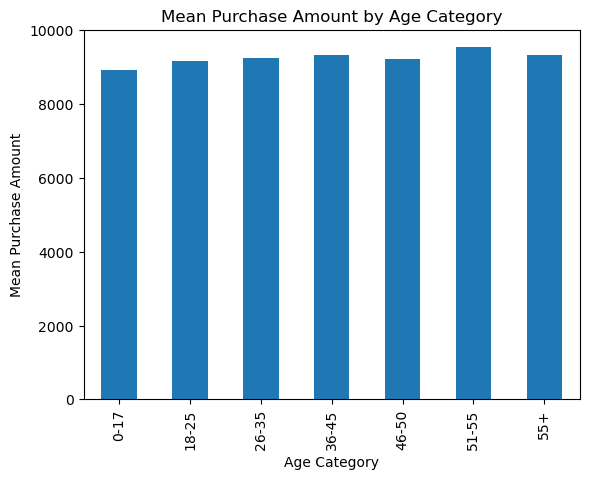

In [71]:
# Calculate the mean purchase amount for each age category
mean_purchase_by_age = data.groupby("Age")["Purchase"].mean()

# Plot the mean purchase amount for each age category
mean_purchase_by_age.plot(kind='bar')
plt.title("Mean Purchase Amount by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Mean Purchase Amount")
plt.show()


Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

C:\Users\Kowshik.Mente\AppData\Local\Temp\ipykernel_22776\4054240021.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_sum_by_age = data.groupby("Age")["Purchase"].sum()


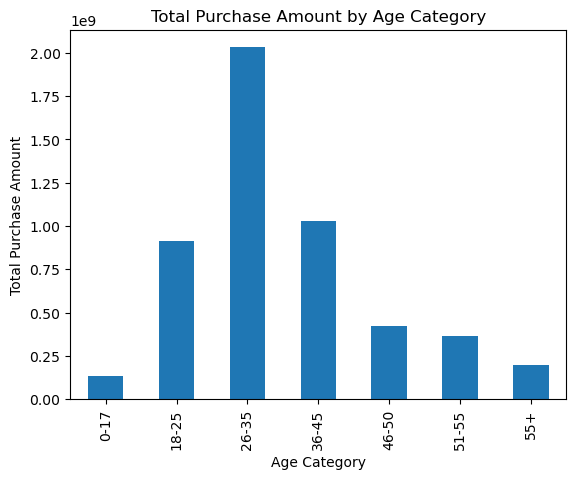

In [73]:
# Convert 'Purchase' column to numeric data
data['Purchase'] = pd.to_numeric(data['Purchase'])

# Group by 'Age' and calculate the sum of purchases
purchase_sum_by_age = data.groupby("Age")["Purchase"].sum()

# Plot the sum of purchases for each age category
purchase_sum_by_age.plot(kind="bar")
plt.title("Total Purchase Amount by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Total Purchase Amount")
plt.show()


Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

### Product_Category_1

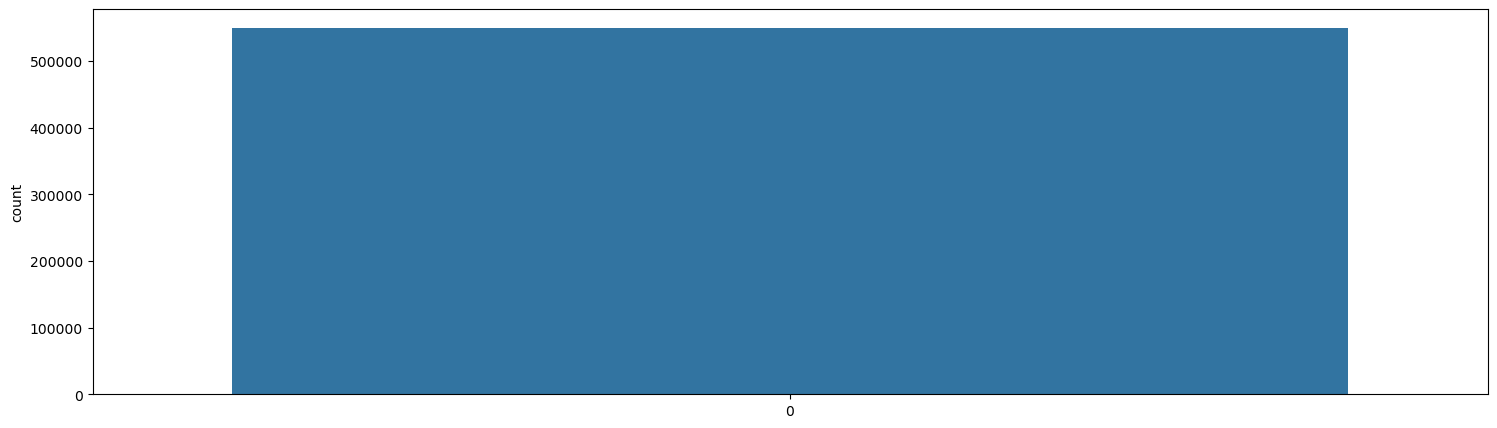

In [74]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])
plt.show()

It is clear that `Product_Category_1` numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

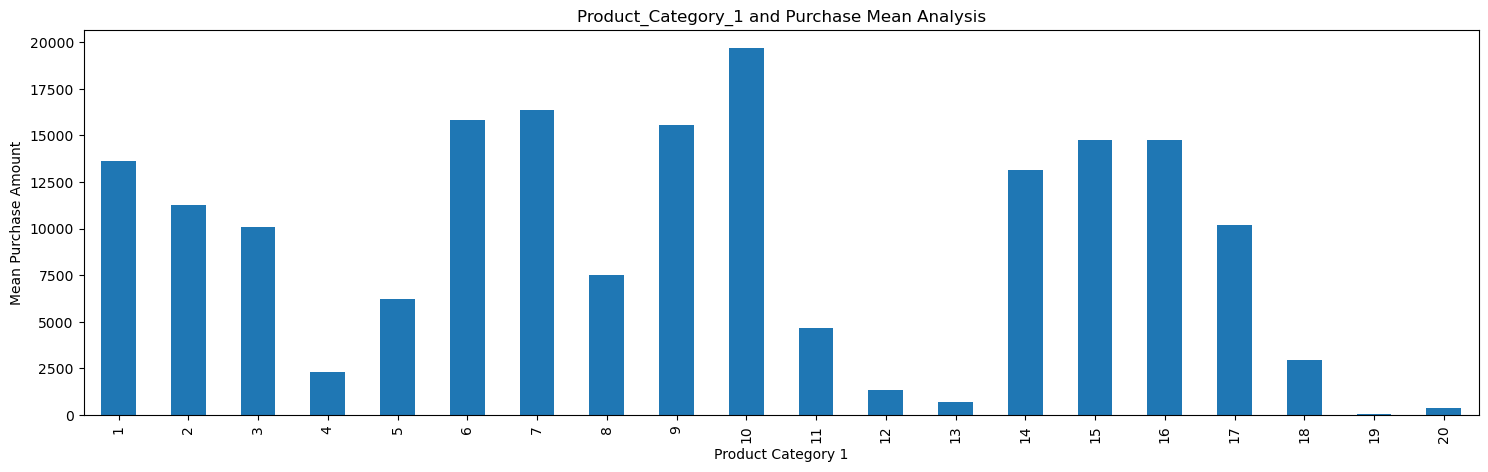

In [76]:
# Convert 'Purchase' column to numeric data
data['Purchase'] = pd.to_numeric(data['Purchase'])

# Group by 'Product_Category_1' and calculate the mean of purchases
purchase_mean_by_category = data.groupby("Product_Category_1")["Purchase"].mean()

# Plot the mean of purchases for each product category
purchase_mean_by_category.plot(kind='bar', figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.xlabel("Product Category 1")
plt.ylabel("Mean Purchase Amount")
plt.show()


If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

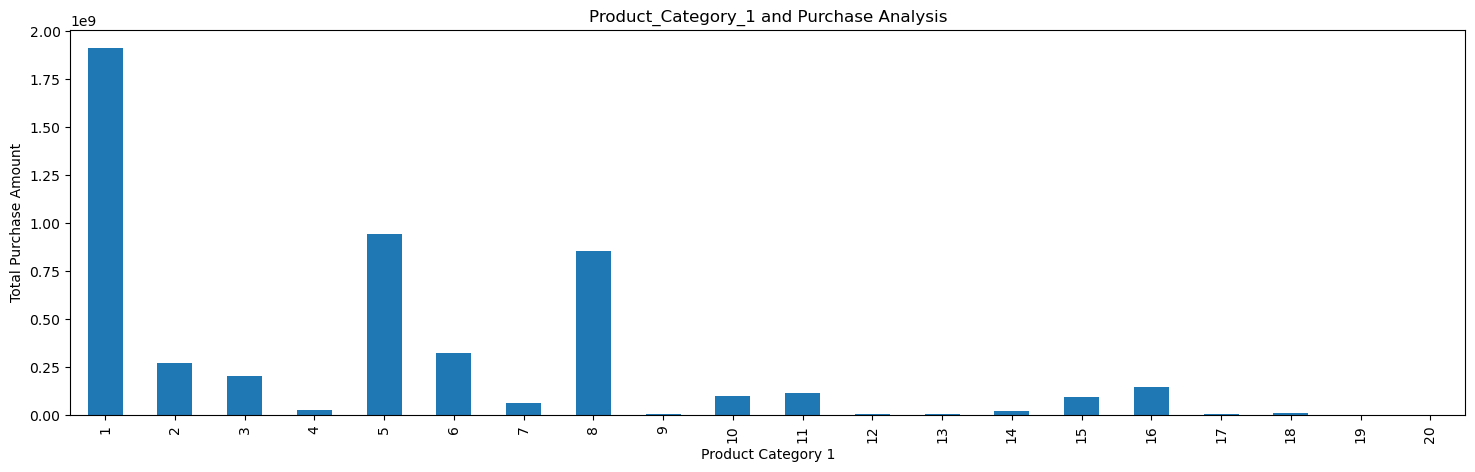

In [78]:
# Convert 'Purchase' column to numeric data
data['Purchase'] = pd.to_numeric(data['Purchase'], errors='coerce')

# Group by 'Product_Category_1' and calculate the sum of purchases
purchase_sum_by_category = data.groupby('Product_Category_1')['Purchase'].sum()

# Plot the sum of purchases for each product category
purchase_sum_by_category.plot(kind='bar', figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.xlabel("Product Category 1")
plt.ylabel("Total Purchase Amount")
plt.show()


The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.

### Product_Category_2

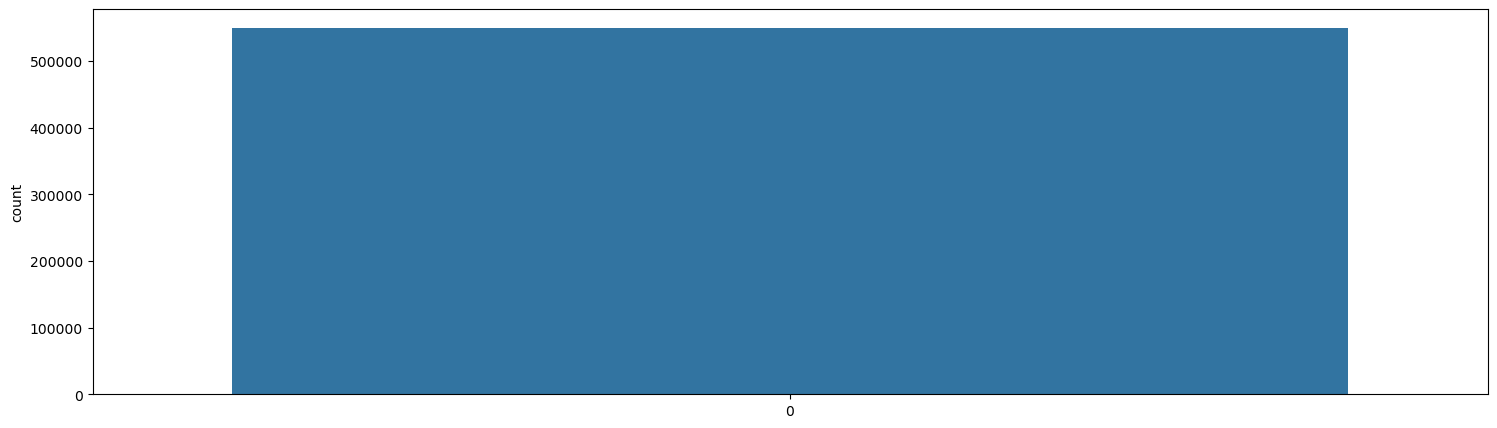

In [79]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_2'])
plt.show()

### Product_Category_3

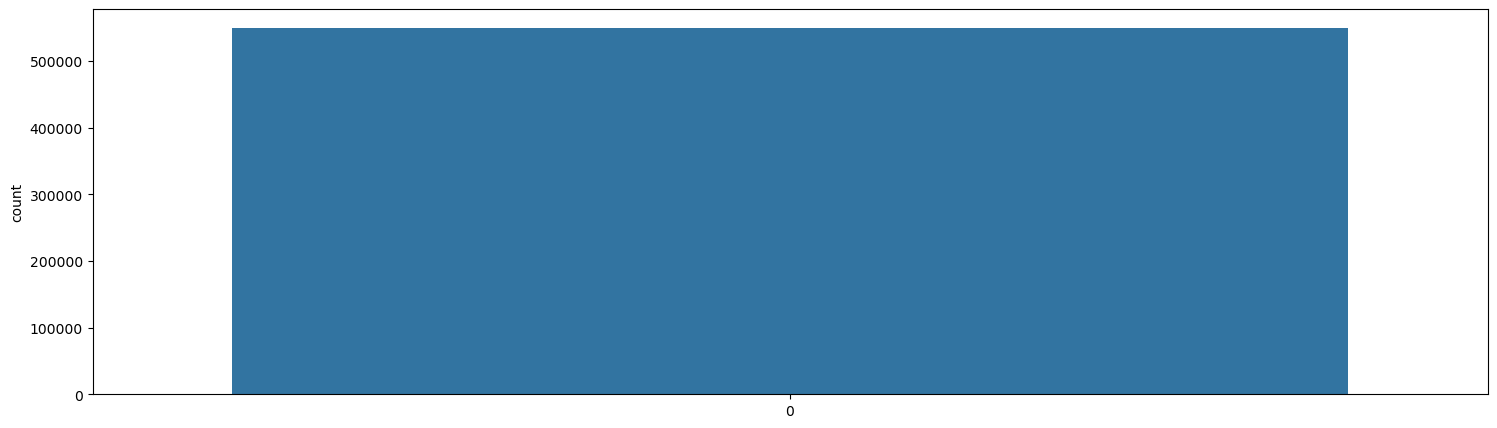

In [80]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])
plt.show()

In [82]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)


ValueError: could not convert string to float: 'P00069042'

## HeatMap

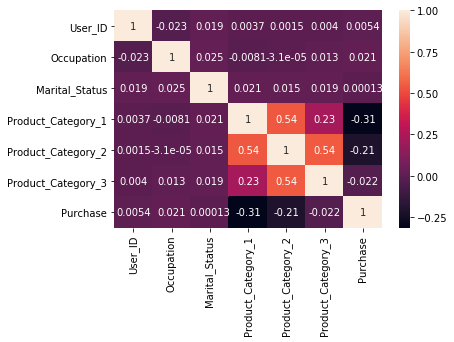

In [161]:
sns.heatmap(data.corr(),annot=True)
plt.show()

There is a some corellation between the product category groups.

In [162]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [163]:
df = data.copy()

In [164]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [165]:
# df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [166]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

## Encoding the categorical variables

In [167]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [168]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [169]:
df['Age'] = lr.fit_transform(df['Age'])

In [170]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [171]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,0,0,0,0,1


In [173]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [174]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 16 columns):
User_ID                          537577 non-null int64
Product_ID                       537577 non-null object
Gender                           537577 non-null int32
Age                              537577 non-null int32
Occupation                       537577 non-null int64
City_Category                    537577 non-null int32
Marital_Status                   537577 non-null int64
Product_Category_1               537577 non-null int64
Product_Category_2               537577 non-null int64
Product_Category_3               537577 non-null int64
Purchase                         537577 non-null int64
Stay_In_Current_City_Years_0     537577 non-null uint8
Stay_In_Current_City_Years_1     537577 non-null uint8
Stay_In_Current_City_Years_2     537577 non-null uint8
Stay_In_Current_City_Years_3     537577 non-null uint8
Stay_In_Current_City_Years_4+    537577 non-null uint8
dtypes: 

## Dropping the irrelevant columns

In [176]:
df = df.drop(["User_ID","Product_ID"],axis=1)

## Splitting data into independent and dependent variables

In [179]:
X = df.drop("Purchase",axis=1)

In [180]:
y=df['Purchase']

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modeling

### Linear Regression

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:
lr.intercept_

9392.78408085134

In [185]:
lr.coef_

array([ 481.31865517,  107.64157841,    5.13000529,  336.95273272,
        -63.3778221 , -317.00345883,    7.9238667 ,  148.12973485,
        -32.78694504,   -1.66930455,   34.63808922,  -12.31969823,
         12.13785861])

In [186]:
y_pred = lr.predict(X_test)

In [187]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [188]:
mean_absolute_error(y_test, y_pred)

3540.3993734221553

In [189]:
mean_squared_error(y_test, y_pred)

21342855.359792948

In [190]:
r2_score(y_test, y_pred)

0.13725207799200811

In [191]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4619.8328281219165


# DecisionTreeRegressor

In [192]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [193]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [194]:
dt_y_pred = regressor.predict(X_test)

In [195]:
mean_absolute_error(y_test, dt_y_pred)

2403.1409470088884

In [196]:
mean_squared_error(y_test, dt_y_pred)

11535194.335807195

In [197]:
r2_score(y_test, dt_y_pred)

0.5337097695969879

In [198]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  3396.3501491759052


# Random Forest Regressor

In [199]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  

In [200]:
RFregressor.fit(X_train, y_train)

C:\Users\Nantha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [201]:
rf_y_pred = RFregressor.predict(X_test)

In [202]:
mean_absolute_error(y_test, rf_y_pred)

2270.784452116351

In [203]:
mean_squared_error(y_test, rf_y_pred)

9708236.383523637

In [204]:
r2_score(y_test, rf_y_pred)

0.6075613770954846

In [205]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3115.8042915952915


# XGBoost Regressor

In [206]:
from xgboost.sklearn import XGBRegressor

In [207]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

C:\Users\Nantha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:14:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1.0, max_delta_step=0,
             max_depth=6, min_child_weight=40, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
             subsample=1, verbosity=1)

In [208]:
xgb_y_pred = xgb_reg.predict(X_test)

In [209]:
mean_absolute_error(y_test, xgb_y_pred)

2154.954637289423

In [210]:
mean_squared_error(y_test, xgb_y_pred)

8290522.888761112

In [211]:
r2_score(y_test, xgb_y_pred)

0.664869986978737

In [212]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2879.326811732408


The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2879